In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#### Read the data

In [6]:
data = pd.read_csv('../datasets/pima_indians_diabetes.csv')

In [7]:
data.head(2)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### Split the data

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = data.iloc[:,:8]
y = data.iloc[:,8]

In [12]:
y.head(2)

0    1
1    0
Name: class, dtype: int64

In [13]:
X.head(2)

,preg,plas,pres,skin,test,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31


In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((614, 8), (154, 8), (614,), (154,))

## Classification

#### Build the model

In [15]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

#### max_depth=8 and n_estimators=50 gave training accuracy 99% and testing accuracy 73 % -- indicating overfit hence changed 

In [29]:
base_model = DecisionTreeClassifier(max_depth=4,criterion='gini')

In [30]:
model = BaggingClassifier(base_estimator=base_model,n_estimators=20,random_state=42)

In [31]:
model.fit(X_train,y_train)

C:\Users\radha\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=4),
                  n_estimators=20, random_state=42)

#### Make predictions for training data and calculate the metrics

In [32]:
from sklearn.metrics import confusion_matrix, classification_report, auc, roc_auc_score, roc_curve

In [33]:
yhat_train = model.predict(X_train)

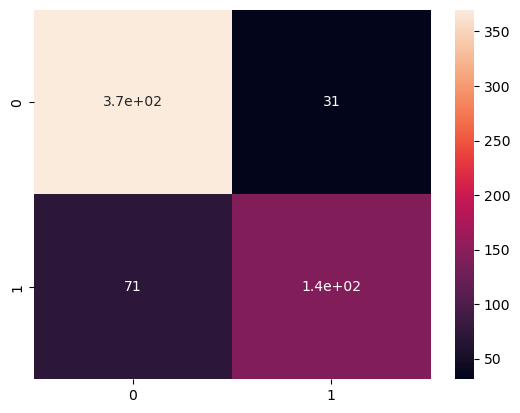

In [34]:
cm = confusion_matrix(y_train, yhat_train)
sns.heatmap(cm, annot=True)
plt.show()

In [35]:
print(cm)

[[370  31]
 [ 71 142]]


In [36]:
print(classification_report(y_train, yhat_train))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       401
           1       0.82      0.67      0.74       213

    accuracy                           0.83       614
   macro avg       0.83      0.79      0.81       614
weighted avg       0.83      0.83      0.83       614



#### Make predictions for testing data and calculate the metrics

In [37]:
yhat_test = model.predict(X_test)

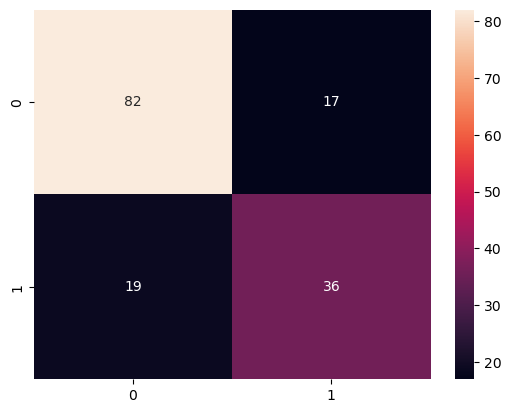

In [38]:
cm = confusion_matrix(y_test, yhat_test)
sns.heatmap(cm, annot=True)
plt.show()

In [39]:
print(classification_report(y_test, yhat_test))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82        99
           1       0.68      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.77       154



In [40]:
## Now training accuracy and testing accuracy in acceptable range